In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define batch specifications
batch_size = 32  # You can adjust this based on your preference
img_height, img_width = 224, 224  # Adjust these dimensions based on your images

# Define paths to the training and validation datasets
train_dataset_path = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train'
valid_dataset_path = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid'

# Load and preprocess the training dataset with error handling
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset_path,
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',  # Use 'int' labels for sparse categorical_crossentropy
    validation_split=0.2,
    subset='training',
    smart_resize=True  # Resize the images preserving their aspect ratio
)

# Load and preprocess the validation dataset with error handling
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dataset_path,
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',  # Use 'int' labels for sparse categorical_crossentropy
    validation_split=0.2,
    subset='validation',
    smart_resize=True  # Resize the images preserving their aspect ratio
)

# Get class names from the training dataset
class_names = training_ds.class_names

# Define the CNN model
MyCnn = tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
MyCnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
retVal = MyCnn.fit(training_ds, validation_data=validation_ds, epochs=2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 23423 files belonging to 13 classes.
Using 18739 files for training.
Found 6055 files belonging to 13 classes.
Using 1211 files for validation.
Epoch 1/2
586/586 [==============================] - 2899s 5s/step - loss: 0.5955 - accuracy: 0.8124 - val_loss: 0.2313 - val_accuracy: 0.9174
Epoch 2/2
586/586 [==============================] - 2666s 5s/step - loss: 0.1546 - accuracy: 0.9460 - val_loss: 0.2808 - val_accuracy: 0.9059


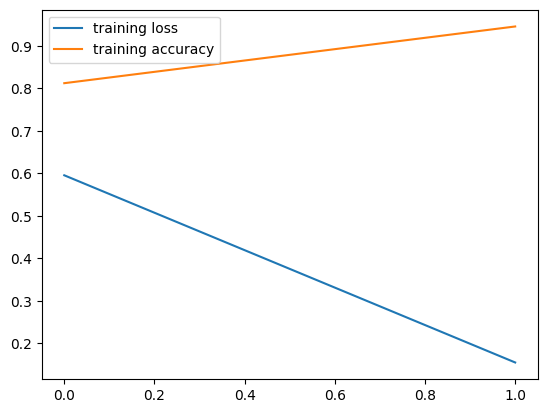

In [ ]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))

# Limit the loop to the number of images in the batch
num_images_to_visualize = min(40, validation_ds.cardinality().numpy() * batch_size)
for images, labels in validation_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels

    # Print the shape of the 'images' tensor
    print("Shape of 'images' tensor:", images.shape)

    # Limit the loop to the actual number of images in the batch
    for i in range(min(num_images_to_visualize, images.shape[0])):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

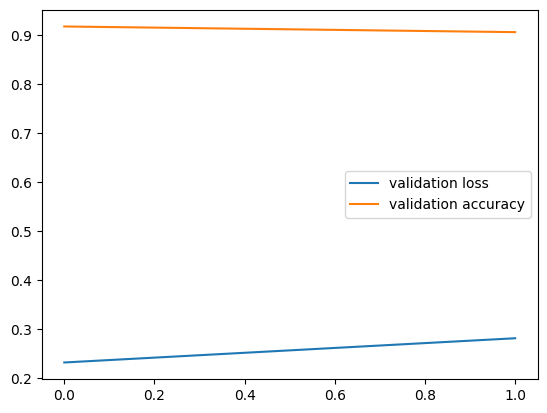

In [ ]:
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()